# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Loading and preparing the data

In [2]:
#import dataset and split into train and test
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


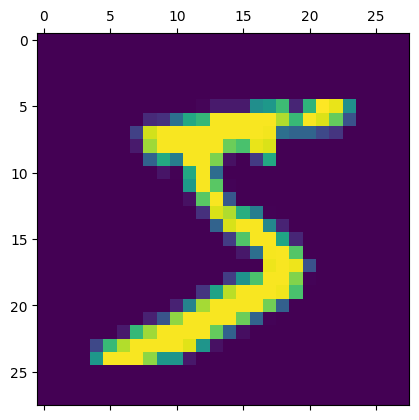

In [3]:
#to see how first image looks
plt.matshow(x_train[0])

In [4]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

# Creating the Model

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [7]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the Model

In [8]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7384 - loss: 1.0097 - val_accuracy: 0.9006 - val_loss: 0.3532
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9018 - loss: 0.3532 - val_accuracy: 0.9171 - val_loss: 0.2907
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9171 - loss: 0.2952 - val_accuracy: 0.9266 - val_loss: 0.2602
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9264 - loss: 0.2578 - val_accuracy: 0.9333 - val_loss: 0.2351
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9320 - loss: 0.2392 - val_accuracy: 0.9382 - val_loss: 0.2178
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9366 - loss: 0.2213 - val_accuracy: 0.9422 - val_loss: 0.2042
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9442 - loss: 0.1970 - val_accuracy: 0.9453 - val_loss: 0.1901
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9471 - loss: 0.1899 - 

# Evaluate the Model

In [9]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9442 - loss: 0.1902
Loss = 0.164
Accuracy = 0.953


# Making Prediction on New Data

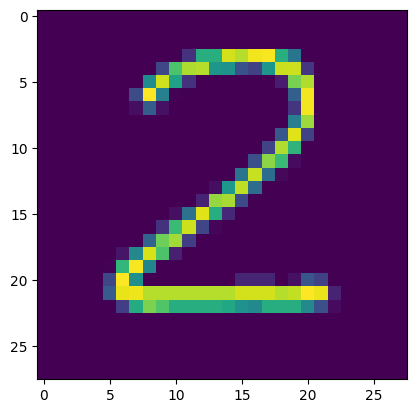

In [10]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# Confusion Matrix

In [11]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 965    0    1    1    0    3    8    1    1    0]
 [   0 1115    3    2    0    1    5    2    7    0]
 [   7    1  974    9    6    3    7    8   15    2]
 [   1    1   10  961    0   10    1    9   13    4]
 [   1    0    6    0  934    0    9    2    5   25]
 [   9    2    1   15    4  831   10    1   14    5]
 [   9    3    3    0    5    9  926    1    2    0]
 [   2    9   21    6    6    1    0  960    2   21]
 [   6    2    5   12    5    7    9    5  919    4]
 [   9    8    1   11   19    4    1    6    8  942]], shape=(10, 10), dtype=int32)
